In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time 
from matplotlib import pyplot as plt

## Load Data

In [2]:

def load_train_set():
    # Reading The Train Set
    train_images_file = open('train-images.idx3-ubyte', 'rb')
    train_images_file.seek(4)
    num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
    train_images_file.seek(16)

    train_labels_file = open('train-labels.idx1-ubyte', 'rb')
    train_labels_file.seek(8)

    train_set = []
    for n in range(num_of_train_images):
        image = np.zeros((784, 1))
        for i in range(784):
            image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
        
        label_value = int.from_bytes(train_labels_file.read(1), 'big')
        label = np.zeros((10, 1))
        label[label_value, 0] = 1
        
        train_set.append((image, label))
    return train_set


In [3]:

def load_test_set():
    # Reading The Test Set
    test_images_file = open('t10k-images.idx3-ubyte', 'rb')
    test_images_file.seek(4)

    test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
    test_labels_file.seek(8)

    num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
    test_images_file.seek(16)

    test_set = []
    for n in range(num_of_test_images):
        image = np.zeros((784, 1))
        for i in range(784):
            image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
        
        label_value = int.from_bytes(test_labels_file.read(1), 'big')
        label = np.zeros((10, 1))
        label[label_value, 0] = 1
        
        test_set.append((image, label))
    
    return test_set


In [4]:
train_set = load_train_set()
test_set = load_test_set()

## part1

In [5]:
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

In [6]:
def check_sets(checking_set):

    x = np.random.randint(0,len(checking_set))
    show_image(checking_set[x][0])
    print(np.argmax(checking_set[x][1]))
    plt.show()


5


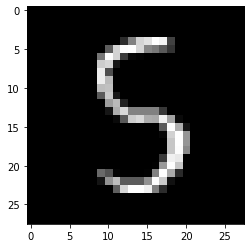

In [7]:

check_sets(train_set)

1


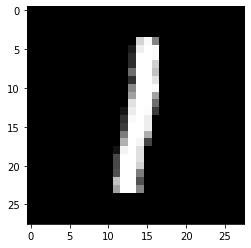

In [8]:
check_sets(test_set)

# part 2
##  fell free to set what ever you want
by this dynamic coding style you can use this neural network for any kind of data with any number of hidden layer.
some part may be deficult to understant in compare to hard code for three layer but both methods follow same idea.

In [184]:
layers_num = 3
layers_cellNums = [28*28,16,16,10]

In [185]:
def sig(x):
    return 1/(1 + np.exp(-x))

In [186]:
def sig_derivative(x):
    s = sig(x)
    ds = s*(1-s)
    return ds

In [187]:
def leaky_relu(x):
    return np.where(x > 0, x, x * 0.1)    


In [188]:
 def leaky_relu_Derivative(x):
    return np.where(x > 0, 1,  0.1) 

In [189]:
def tanh(x):
#     t = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return np.tanh(x)

In [190]:
def tanh_deriv(x):
    return 1-(tanh(x)**2)

In [191]:
def calculate_layer_output(W_nextL, al ,b_nextL, activation_func ):
    '''
    inputs:
        w_nextL : is weights matrix in shape(k * n), k: number of cell in next layer, n: number of cell in current layer
        al : input vector of current layer in shape(n * 1)
        b_nextL : bias vector in shape (n * 1)
    output :
        a_nextL : output of this layer in shape (n * 1)
    '''
    
    return activation_func((W_nextL @ al) + b_nextL)

In [192]:
def init_matrices(layers_cellNums):
    weights_matrix_list =[]
    bias_list = []
    
    for i in range(layer_num):
        matrix = np.random.normal(0, 1, size=(layers_cellNums[i+1],layers_cellNums[i] ))
        weights_matrix_list.append(matrix)
   
    for cell_num in layers_cellNums[1:]:
        bias_list.append(np.zeros((cell_num,1)))
    
    return weights_matrix_list, bias_list

In [193]:
def claculate_network_output(weights_matrix_list, input_data, bias_list, activation_func ):
    '''
    inputs : 
        weights_matrix_list : a list contains weights matrix in order of layers, here it contains 3 weights matrix
        input data : vector of an image
        bias_list : a list contains bias vector for each layer in order
    output:
        network_output : final result of network which is digit 
    '''
    a_list = []
    a_list.append(input_data)
    for i in range(len(weights_matrix_list)):
        if i ==  (layers_num-1) :
            activation_func = sig
        res = calculate_layer_output(weights_matrix_list[i],a_list[i],bias_list[i], activation_func)
        a_list.append(res)
    return a_list

In [194]:
def calculate_accuracy(actual_data, Nactual_data,weights_matrix_list,bias_list, activation_func):
    correct_answer = 0
    for i in range(Nactual_data):
        predicted_output = claculate_network_output(weights_matrix_list,actual_data[i][0],bias_list, activation_func)
        if np.argmax(predicted_output[-1]) == np.argmax(actual_data[i][1]):
            correct_answer += 1
    return correct_answer/Nactual_data

## accuracy for normal random weights and zero biases

In [195]:
weights_matrix_list, bias_list = init_matrices(layers_cellNums)
calculate_accuracy(train_set,100, weights_matrix_list, bias_list, sig)

0.12

## part3

In [196]:
def calculate_deriviate(weights_matrix,bias,a_prevL,dcost_dat, layer_num, activation_derivative ):
    if layer_num == (layers_num-1): #for last layer we always use sigmoid 
        activation_derivative = sig_derivative
    row,col = weights_matrix.shape
    weights_matrix_deriviate = np.zeros((row,col)) 
    bias_deriviate = np.zeros((row,1))
    dcost_dap = np.zeros((col,1)) 
    for j in range(row):
        bias_deriviate[j] = dcost_dat[j] * activation_derivative(np.dot(weights_matrix[j][:],a_prevL)+ bias[j])
        for k in range(col):
            weights_matrix_deriviate[j][k] = bias_deriviate[j]*a_prevL[k]
    if layer_num != 0:        
        for k in range(col):
            for j in range(row):
                dcost_dap[k] += bias_deriviate[j] * weights_matrix[j][k]
    return weights_matrix_deriviate,bias_deriviate, dcost_dap

In [197]:
def calculate_deriviate_vecorized(weights_matrix,bias,a_prevL,dcost_dat, layer_num, activation_derivative):
    if layer_num == (layers_num -1): #for last layer we always use sigmoid 
        activation_derivative = sig_derivative
    row,col = weights_matrix.shape
    dcost_dap = np.zeros((col,1)) 
    bias_deriviate = dcost_dat * activation_derivative(np.dot(weights_matrix,a_prevL)+ bias)
    weights_matrix_deriviate = bias_deriviate @ np.transpose(a_prevL)
    if layer_num != 0: #for first layer we dont need dcost/da
        dcost_dap = np.transpose(weights_matrix) @ bias_deriviate
    return weights_matrix_deriviate,bias_deriviate, dcost_dap

In [219]:
def backprog(weights_matrix_list,a_list, bias_list, image_label, vectorized, activation_derivative):
    weights_matrix_deriviate_list= []
    bias_deriviate_list = []
    dcost_da_list = [0 for x in range(layers_num)]
    dcost_daj = 2*(a_list[-1]-image_label)
    dcost_da_list[layers_num-1] = dcost_daj
    for i in range(layers_num-1,-1,-1):
        if vectorized == 1:
            w,b,d = calculate_deriviate_vecorized(weights_matrix_list[i],bias_list[i],a_list[i],dcost_da_list[i],i, activation_derivative)
        else :
            w,b,d = calculate_deriviate(weights_matrix_list[i],bias_list[i],a_list[i],dcost_da_list[i],i, activation_derivative)
        weights_matrix_deriviate_list.append(w)
        bias_deriviate_list.append(b)
        dcost_da_list[i-1] = d

    return weights_matrix_deriviate_list[::-1],bias_deriviate_list[::-1]
        
    

In [214]:
def calculate_gradian(weights_matrix_list, bias_list, batch, vectorized, activation_func, activation_derivative):
    weights_Gmatrix_list =[]
    bias_G_list = []
    
    for i in range(layer_num):
        matrix = np.zeros((layers_cellNums[i+1],layers_cellNums[i] ))
        weights_Gmatrix_list.append(matrix)
    
    for cell_num in layers_cellNums[1:]:
        bias_G_list.append(np.zeros((cell_num,1)))
   
    for image_data, image_label in batch : 
        a_list = claculate_network_output(weights_matrix_list,image_data, bias_list, activation_func)
        weights_matrix_deriviate_list,bias_deriviate_list = backprog(weights_matrix_list,a_list,bias_list, image_label, vectorized, activation_derivative)
        for i in range(len(weights_Gmatrix_list)):
            weights_Gmatrix_list[i] += weights_matrix_deriviate_list[i]
            bias_G_list[i] += bias_deriviate_list[i]
    return weights_Gmatrix_list, bias_G_list

In [215]:
def calculate_cost(actual_value, Ndata,weights_matrix_list,bias_list, activation_func):
    cost = 0
    for i in range(Ndata):
        predicted_output = claculate_network_output(weights_matrix_list,actual_value[i][0],bias_list, activation_func)
        cost += ((predicted_output[-1] - actual_value[i][1])**2)
    return cost/Ndata
    

In [216]:
def stochastic_gradiant_descent(epoch_num, batch_size, train_data, learning_rate, vectorized,activation_func, activation_derivative ):
    weights_matrix_list1, bias_list1 = init_matrices(layers_cellNums)
    cost_list =[]
    for i in range(epoch_num):
        random.shuffle(train_data)
        batch_list = [train_data[x:x+batch_size] for x in range(0, len(train_data), batch_size)]
        for batch in batch_list:
            weights_Gmatrix_list1, bias_G_list1 = calculate_gradian(weights_matrix_list1,bias_list1, batch, vectorized, activation_func, activation_derivative)
            for i in range(len(weights_matrix_list1)):
                weights_matrix_list1[i] -= (learning_rate *weights_Gmatrix_list1[i])/batch_size
                bias_list1[i] -= (learning_rate * bias_G_list1[i])/ batch_size
        cost_list.append(calculate_cost(train_data,len(train_data),weights_matrix_list1,bias_list1, activation_func))
    return weights_matrix_list1, bias_list1, cost_list
            
    
    

In [217]:
def show_result(actual_data,num_entries, weights_matrix_list, bias_list, cost_list, activation_func ):
    accuracy = calculate_accuracy(actual_data, num_entries,weights_matrix_list,bias_list, activation_func )
    print("accuracy is: {0:.4f} ".format(accuracy*100))
    norm_list = [(np.linalg.norm(x)**2) for x in cost_list]
    plt.plot(norm_list)

In [220]:
%%time
weights_matrix_list_unvec, bias_list_unvec, cost_list_unvec = stochastic_gradiant_descent(20,10,train_set[:100],1,0, sig, sig_derivative)

CPU times: user 1min 25s, sys: 50.4 s, total: 2min 16s
Wall time: 34 s


accuracy is: 76.0000 


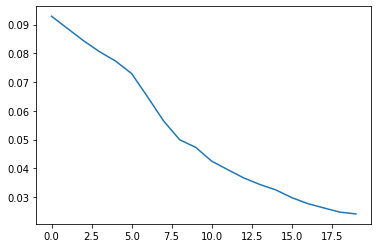

In [221]:
show_result(train_set, 100, weights_matrix_list_unvec, bias_list_unvec,cost_list_unvec, sig)

In [232]:
%%time
weights_matrix_list_vec, bias_list_vec, cost_list_vec = stochastic_gradiant_descent(200,10,train_set[:100],1,1, sig, sig_derivative)

CPU times: user 8.51 s, sys: 4.85 s, total: 13.4 s
Wall time: 3.34 s


accuracy is: 99.0000 


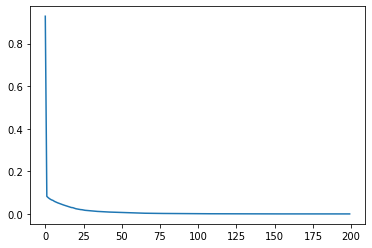

In [233]:
show_result(train_set,100,weights_matrix_list_vec, bias_list_vec, cost_list_vec, sig)

In [234]:
%%time
weights_matrix_list_vec, bias_list_vec, cost_list_vec = stochastic_gradiant_descent(5,50,train_set,1,1, sig, sig_derivative)

CPU times: user 1min 57s, sys: 1min 7s, total: 3min 4s
Wall time: 46.3 s


accuracy is: 90.5867 


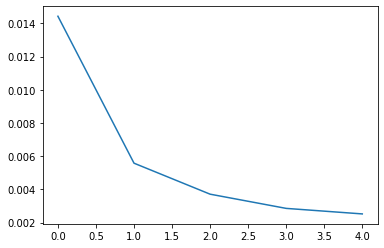

In [235]:
show_result(train_set, len(train_set),weights_matrix_list_vec, bias_list_vec, cost_list_vec, sig )

accuracy is: 90.4100 


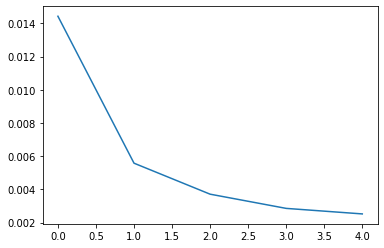

In [236]:
show_result(test_set, len(test_set),weights_matrix_list_vec, bias_list_vec, cost_list_vec, sig )

## optional 1


In [199]:
def shift_matirx(matrix, shift):
    matrix = np.roll(matrix,shift)
    matrix[:,:shift] = 0
    return matrix.reshape(-1,1)

In [200]:
shifted_test_set = [(shift_matirx(x[0].reshape(28,28),4),x[1]) for x in test_set]

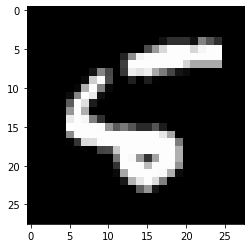

In [201]:
show_image(test_set[8][0])

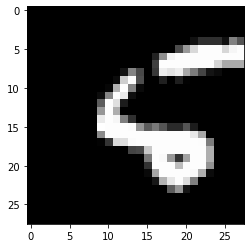

In [202]:
show_image(shifted_test_set[8][0])

In [203]:
calculate_accuracy(shifted_test_set, len(shifted_test_set),weights_matrix_list_vec,bias_list_vec, sig )

0.2632

## optional part2

## tanh

In [237]:
%%time
weights_matrix_list_vec, bias_list_vec, cost_list_vec = stochastic_gradiant_descent(5,50,train_set,1,1, tanh, tanh_deriv)

CPU times: user 1min 45s, sys: 1min, total: 2min 46s
Wall time: 41.7 s


accuracy is: 88.1183 


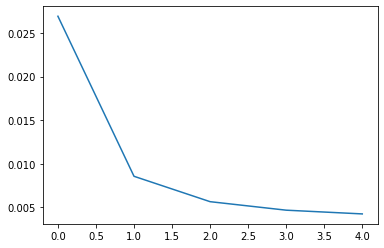

In [238]:
show_result(train_set, len(train_set),weights_matrix_list_vec, bias_list_vec, cost_list_vec, tanh )

## relu

In [239]:
def RAI(fan_in, fan_out):
    V = np.random.randn(fan_out, fan_in + 1) * 0.6007 / fan_in ** 0.5
    for j in range(fan_out):
        k = np.random.randint(0, high=fan_in + 1)
        V[j, k] = np.random.beta(2, 1)
    W = V[:, :-1]
    b = np.reshape(V[:, -1], (fan_out, 1))
    return W.astype(np.float32), b.astype(np.float32)

In [240]:
def stochastic_gradiant_descent(epoch_num, batch_size, train_data, learning_rate, vectorized,activation_func, activation_derivative ):
    w1 = np.random.normal(0,2/784,size=(16,784))
    b1 = np.zeros((16,1))
    w2, b2 = RAI(16, 16)
    w3, b3 = RAI(16, 10)
    weights_matrix_list1 = [w1,w2,w3]
    bias_list1 = [b1, b2, b3]
    
    cost_list =[]
    for i in range(epoch_num):
        random.shuffle(train_data)
        batch_list = [train_data[x:x+batch_size] for x in range(0, len(train_data), batch_size)]
        for batch in batch_list:
            weights_Gmatrix_list1, bias_G_list1 = calculate_gradian(weights_matrix_list1,bias_list1, batch, vectorized, activation_func, activation_derivative)
            for i in range(len(weights_matrix_list1)):
                weights_matrix_list1[i] -= (learning_rate *weights_Gmatrix_list1[i])/batch_size
                bias_list1[i] -= (learning_rate * bias_G_list1[i])/ batch_size
        cost_list.append(calculate_cost(train_data,len(train_data),weights_matrix_list1,bias_list1, activation_func))
    return weights_matrix_list1, bias_list1, cost_list
            
    
    

In [243]:
%%time
weights_matrix_list_vec, bias_list_vec, cost_list_vec = stochastic_gradiant_descent(5,50,train_set,0.5,1, leaky_relu, leaky_relu_Derivative)

CPU times: user 2min 19s, sys: 1min 21s, total: 3min 40s
Wall time: 55.1 s


accuracy is: 94.0533 


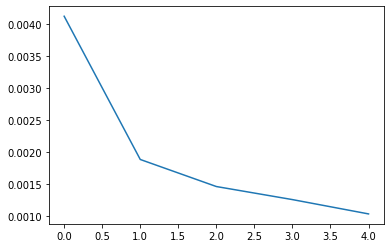

In [244]:
show_result(train_set, len(train_set),weights_matrix_list_vec, bias_list_vec, cost_list_vec, leaky_relu )